In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv('annual-change-forest-area.csv')
df = df.dropna()
print(df.head())


      Entity Code  Year  Net forest conversion
0    Algeria  DZA  1990                -8800.0
1    Algeria  DZA  2000                33900.0
2    Algeria  DZA  2010                 7600.0
3    Algeria  DZA  2015                -1400.0
4  Argentina  ARG  1990              -182600.0


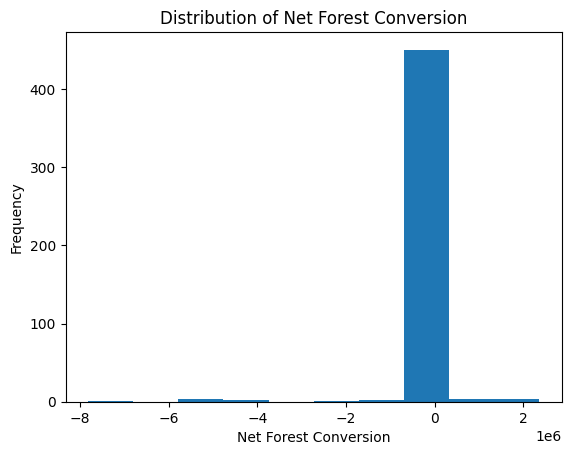

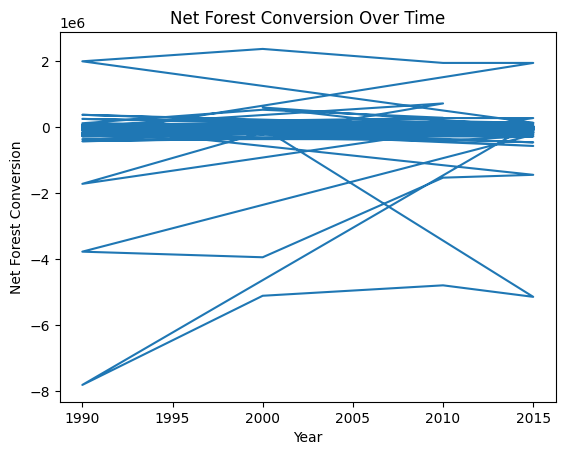

In [ ]:
import matplotlib.pyplot as plt

# Calculate summary statistics
summary_stats = df.groupby('Year')['Net forest conversion'].describe()

# Visualize the distribution of net forest conversion values
plt.hist(df['Net forest conversion'], bins=10)
plt.xlabel('Net Forest Conversion')
plt.ylabel('Frequency')
plt.title('Distribution of Net Forest Conversion')
plt.show()

# Plot trends or patterns over time
plt.plot(df['Year'], df['Net forest conversion'])
plt.xlabel('Year')
plt.ylabel('Net Forest Conversion')
plt.title('Net Forest Conversion Over Time')
plt.show()


In [ ]:

# Calculate the total deforestation for each country over the given time period
total_deforestation = df.groupby('Entity')['Net forest conversion'].sum()

# Calculate the number of years for each country in the dataset
years_per_country = df.groupby('Entity')['Year'].nunique()

# Calculate the average deforestation rate for each country
average_deforestation_rate = total_deforestation / years_per_country

# Create a new dataframe for feature engineering results
feature_engineered_df = pd.DataFrame({
    'Country': average_deforestation_rate.index,
    'Average Deforestation Rate': average_deforestation_rate.values
})

# Print the feature-engineered dataframe
print(feature_engineered_df.head())


     Country  Average Deforestation Rate
0    Algeria                 7825.000000
1  Argentina              -206800.000000
2      Aruba                    0.000000
3  Australia                92023.333333
4    Austria                 3987.500000


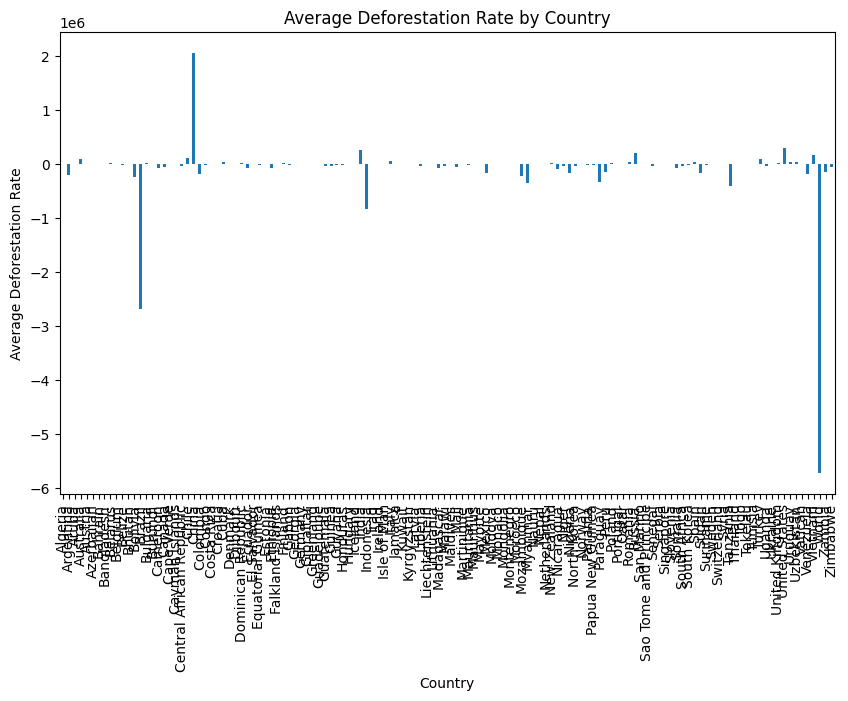

In [ ]:
import matplotlib.pyplot as plt

# Group data by country and calculate average deforestation rate
country_avg_deforestation = df.groupby('Entity')['Net forest conversion'].mean()

# Plot the bar plot
plt.figure(figsize=(10, 6))
country_avg_deforestation.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Deforestation Rate')
plt.title('Average Deforestation Rate by Country')
plt.xticks(rotation=90)
plt.show()


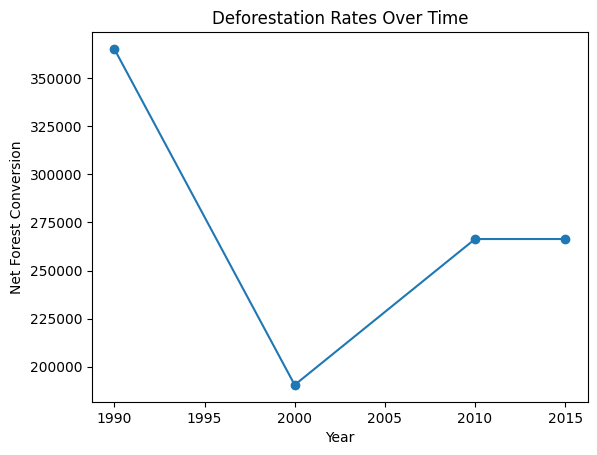

In [ ]:
import matplotlib.pyplot as plt

# Select a specific country or region
country_data = df[df['Entity'] == 'India']

# Plot the deforestation rates over time
plt.plot(country_data['Year'], country_data['Net forest conversion'], marker='o')
plt.xlabel('Year')
plt.ylabel('Net Forest Conversion')
plt.title('Deforestation Rates Over Time')
plt.show()


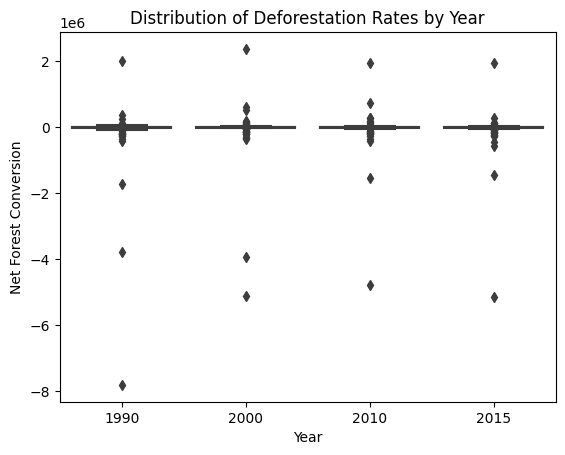

In [ ]:
import seaborn as sns

# Create a box plot of deforestation rates by year
sns.boxplot(x='Year', y='Net forest conversion', data=df)
plt.xlabel('Year')
plt.ylabel('Net Forest Conversion')
plt.title('Distribution of Deforestation Rates by Year')
plt.show()


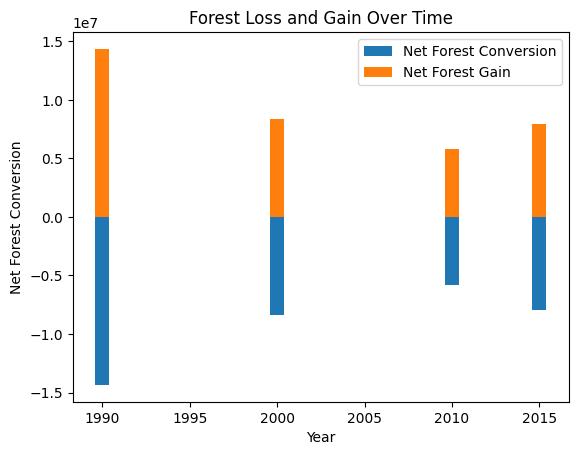

In [ ]:
# Group the data by year and calculate the sum of forest loss and gain
yearly_data = df.groupby('Year')['Net forest conversion'].sum().reset_index()

# Create a stacked bar chart
plt.bar(yearly_data['Year'], yearly_data['Net forest conversion'], label='Net Forest Conversion')
plt.bar(yearly_data['Year'], -yearly_data['Net forest conversion'], label='Net Forest Gain')
plt.xlabel('Year')
plt.ylabel('Net Forest Conversion')
plt.title('Forest Loss and Gain Over Time')
plt.legend()
plt.show()


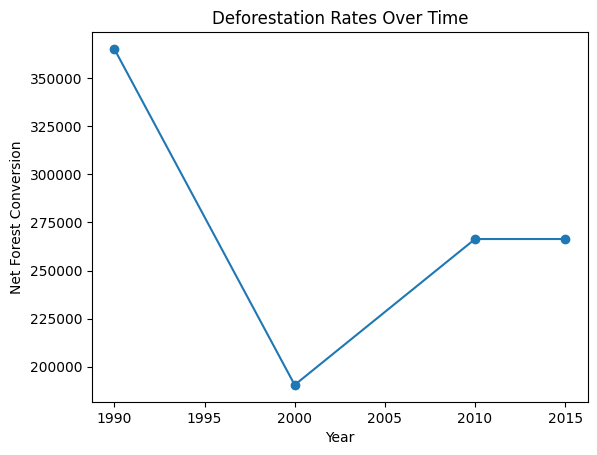

In [ ]:
import matplotlib.pyplot as plt

# Select a specific country or region
country_data = df[df['Entity'] == 'India']

if not country_data.empty:
    # Plot the deforestation rates over time
    plt.plot(country_data['Year'], country_data['Net forest conversion'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Net Forest Conversion')
    plt.title('Deforestation Rates Over Time')
    plt.show()
else:
    print('No data available for the specified country or region.')


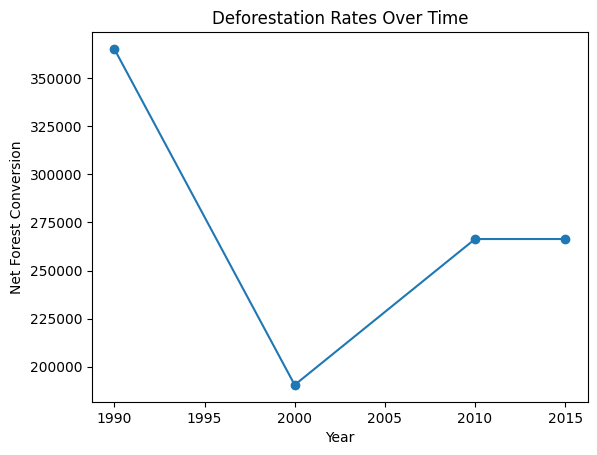

In [ ]:
# Time Series Analysis

import matplotlib.pyplot as plt

# Select a specific country or region
country_data = df[df['Entity'] == 'India']

# Plot the deforestation rates over time
plt.plot(country_data['Year'], country_data['Net forest conversion'], marker='o')
plt.xlabel('Year')
plt.ylabel('Net Forest Conversion')
plt.title('Deforestation Rates Over Time')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Year'], df['Net forest conversion'], test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape the input data
X_train = X_train.values.reshape(-1, 1, 1)
X_test = X_test.values.reshape(-1, 1, 1)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
mse = model.evaluate(X_test, y_test)


Epoch 1/10
12/12 [==============================] - 2s 3ms/step - loss: 447711019008.0000
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 447703416832.0000
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 447694733312.0000
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 447670910976.0000
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 447655968768.0000
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 447646498816.0000
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 447635587072.0000
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 447627198464.0000
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 447618187264.0000
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 314657570816.0000


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Read the dataset
df = pd.read_csv('annual-change-forest-area.csv')

# Clean the data (handle missing values, data inconsistencies, etc.)
df = df.dropna()  # Drop rows with missing values

# Reset the index
df = df.reset_index(drop=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Fit the ARIMA model
model = sm.tsa.ARIMA(train_data['Net forest conversion'], order=(1, 0, 0))
model_fit = model.fit()

# Forecast using the ARIMA model
start_index = len(train_data)
end_index = len(df) - 1
forecast = model_fit.predict(start=start_index, end=end_index)

# Calculate the mean squared error (MSE)
mse = ((forecast - test_data['Net forest conversion']) ** 2).mean()


In [ ]:
mse

1455833290331.9243

In [ ]:
X_train = X_train.reshape(-1, 1, 1)
X_test = X_test.reshape(-1, 1, 1)


In [ ]:
model = sm.tsa.ARIMA(train_data['Net forest conversion'], order=(1, 0, 0))
model_fit = model.fit()

# Forecast using the ARIMA model
forecast = model_fit.predict(start=start_index, end=end_index)

# Calculate the mean squared error (MSE)
mse = ((forecast - test_data['Net forest conversion']) ** 2).mean()
print("MSE:", mse)



MSE: 1455833290331.9243


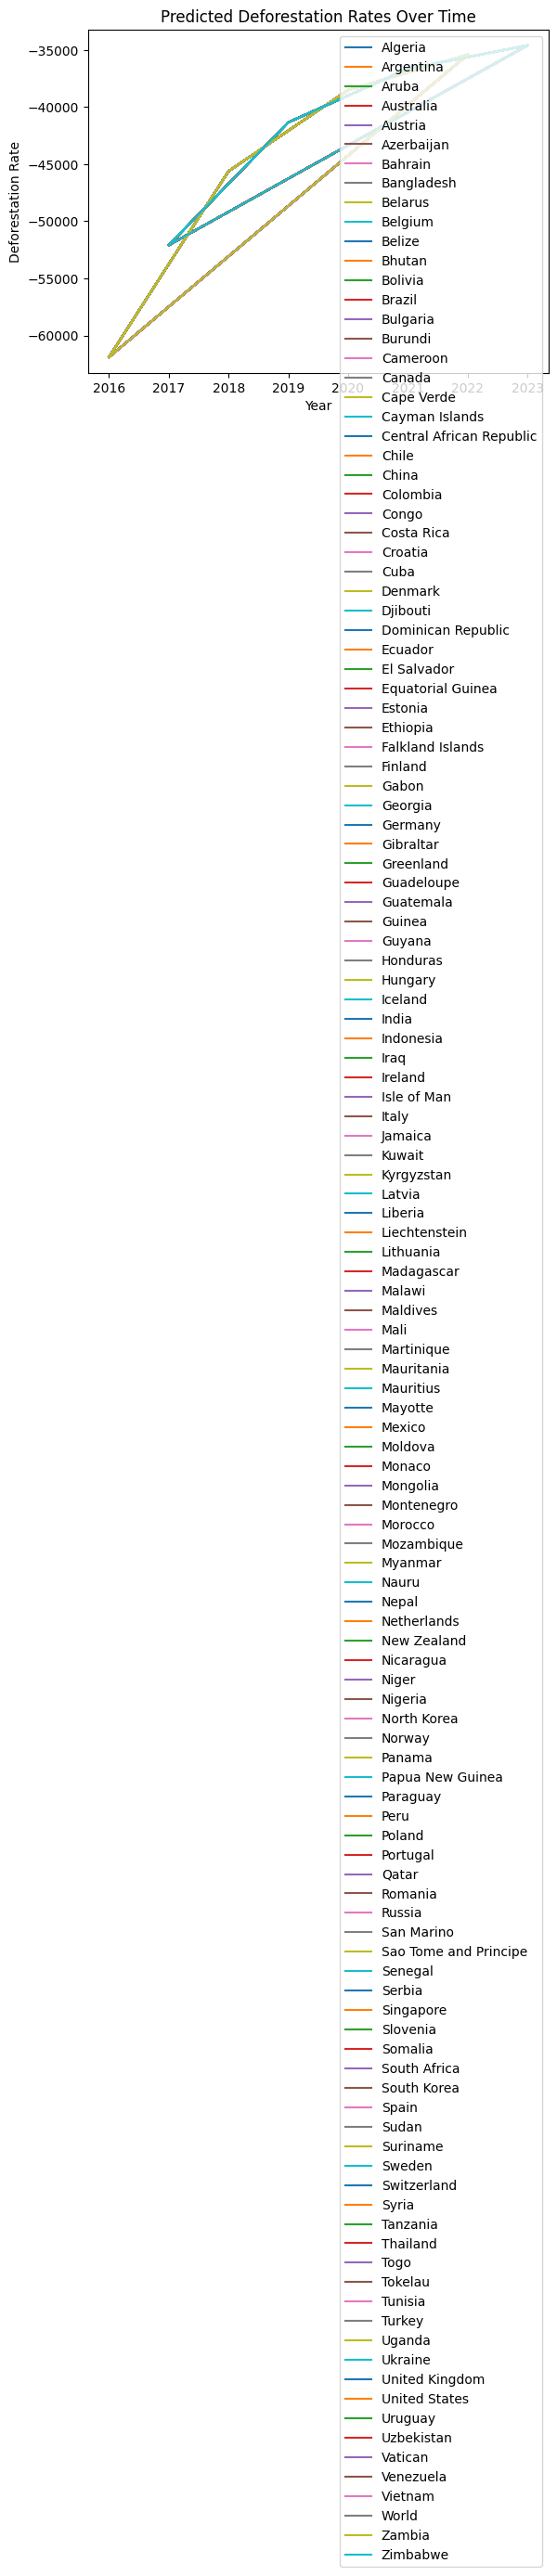

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the dataset
df = pd.read_csv('annual-change-forest-area.csv')

# Clean the data (handle missing values, data inconsistencies, etc.)
df = df.dropna()  # Drop rows with missing values

# Reset the index
df = df.reset_index(drop=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Fit the ARIMA model
model = sm.tsa.ARIMA(train_data['Net forest conversion'], order=(1, 0, 0))
model_fit = model.fit()

# Forecast using the ARIMA model
start_index = len(train_data)
end_index = len(df) - 1
forecast = model_fit.get_forecast(steps=8).predicted_mean

# Create a new dataframe for predictions
unique_entities = df['Entity'].unique()
years = range(2016, 2024)
df_pred = pd.DataFrame({
    'Year': [year for _ in unique_entities for year in years],
    'Entity': list(unique_entities) * len(years),
    'Predicted Deforestation': list(forecast) * len(unique_entities)
})

# Visualize the predicted deforestation rates for each country
for country in unique_entities:
    country_data = df_pred[df_pred['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Predicted Deforestation'], label=country)

plt.xlabel('Year')
plt.ylabel('Deforestation Rate')
plt.title('Predicted Deforestation Rates Over Time')
plt.legend()
plt.show()


In [ ]:
import pickle

# Fit the ARIMA model
model = sm.tsa.ARIMA(train_data['Net forest conversion'], order=(1, 0, 0))
model_fit = model.fit()

# Save the ARIMA model
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)
